In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
def read_csv_wrapper(filepath) -> pd.DataFrame:
    df = pd.read_csv(filepath, index_col = 0)
    df.set_index(pd.to_datetime(df.index), inplace = True)
    return df

def get_dfs(run_info):
    je_df = read_csv_wrapper(f"results/{run_info}/JointEntropy.csv")
    te_df = read_csv_wrapper(f"results/{run_info}/TransferEntropy.csv")
    info_df = pd.read_csv(f"results/{run_info}/info.csv")
    div_df = te_df/je_df
    return div_df, te_df, je_df, info_df



In [41]:
divided_df, transfer_entropy_df, joint_entropy_df,info_df = get_dfs("09-02-2021__14:51:26") 

In [84]:
asset_list = [col.strip('assets:').strip(" '") for col in info_df.columns]

In [85]:
asset_list


['BTCUSDT', 'ETHUSDT', 'ADAUSDT']

In [86]:
df = divided_df

In [101]:
assets_string = '_'.join(asset_list)

# Histogram

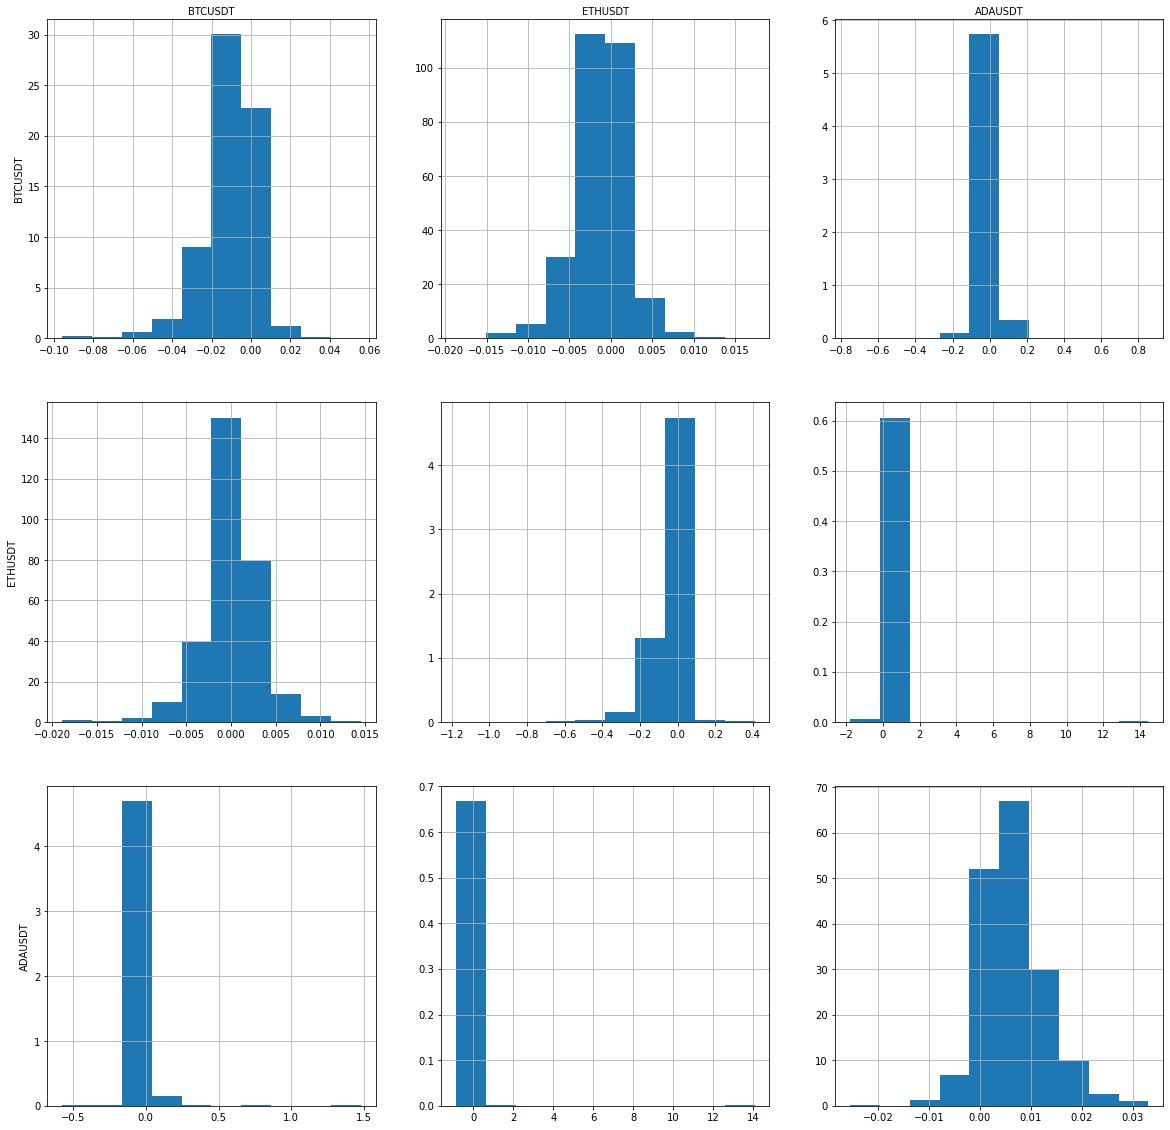

In [103]:
ncols = int(np.sqrt(len(df.columns)))
fig, axes = plt.subplots(ncols=ncols, nrows=ncols, figsize=(20,20));

i, j = 0,0
for col in df.columns:
    if j == ncols:
        j = 0
        i+=1
    df[col].hist(ax=axes[i,j], density=True);
    if j == 0:
        axes[i,j].set_ylabel(asset_list[i])
    if i == 0:
        axes[i,j].set_xlabel(asset_list[j])    
        axes[i,j].xaxis.set_label_position('top') 
        
    j+=1
filename = assets_string + "_histogram.jpg"
plt.savefig(f"results/{filename}")

# Mean

In [117]:
series = df.mean()
ncols = int(np.sqrt(len(df.columns)))

i, j = 0,0
matrix = np.empty(shape=(ncols, ncols))
for col in series.index:
    if j == ncols:
        j = 0
        i+=1
    
    matrix[i, j] = series[col]
        
    j+=1

matrix_df = pd.DataFrame(data=matrix, index=asset_list, columns=asset_list)

In [116]:
series.index

Index(['BTCUSDT_BTCUSDT', 'BTCUSDT_ETHUSDT', 'BTCUSDT_ADAUSDT',
       'ETHUSDT_BTCUSDT', 'ETHUSDT_ETHUSDT', 'ETHUSDT_ADAUSDT',
       'ADAUSDT_BTCUSDT', 'ADAUSDT_ETHUSDT', 'ADAUSDT_ADAUSDT'],
      dtype='object')

In [118]:
matrix_df

,BTCUSDT,ETHUSDT,ADAUSDT
BTCUSDT,-0.010454,-0.001127,0.004988
ETHUSDT,0.000074,-0.047543,0.035244
ADAUSDT,-0.003536,0.016327,0.006480


In [109]:
import seaborn as sns

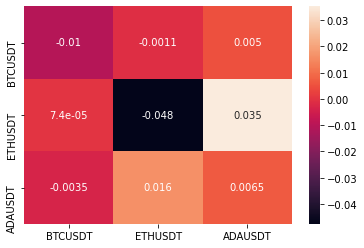

In [113]:
sns.heatmap(matrix_df,annot=True);

In [121]:
function_to_run = mean
df.function_to_run()

NameError: name 'mean' is not defined